# E-Commerce Behavior Data
### Data Mining Project 
By Suci Aulya Putri

# E-Commerce Behavior Data  Dataset

- E-Commerce is a business model that lets firms and individuals buy and sell things over the internet. 
- Behavioral data is data generated by, or in response to, a customer’s engagement with a business. 

### Data Understanding
* Behavior data for November 2019 from a large multi-category online store. Each row in the file represents an event. All events are related to products and users. Each event is like many-to many relation between products and users.
* Source Data: https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store
* Data Dictionary:
  - event_time: Time when event happened at (in UTC).
  - event_type: Only one kind of event: purchase.
  - product_id: ID of a product
  - category_id: Product's category ID
  - category_code: Product's category taxonomy (code name) if it was possible to make it. Usually
present for meaningful categories and skipped for different kinds of accessories.
  - brand: Downcased string of brand name. Can be missed.
  - price: Float price of a product. Present.
  - user_id: Permanent user ID.
  - user_session: Temporary user's session ID. Same for each user's session. Is changed every
time user come back to online store from a long pause.

# Business Question

1. How is the behavior of Visitors/Customers towards the goods available in the online store in October 2019?
2. What items are most viewed by visitors/customers in October
2019?
3. What brand of goods were purchased the most by Visitors/Customers in October 2019?
4. What is the maximum,minimum, and average price of goods in the Online Store in October 2019?
5. How is the behavior of visitors at a specific time of the day?
6. What is the best product to sell at a specific time of the day?
7.  How is the behavior of our repeat user vs new user?

# Import Libraries

In [ ]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dtime
from datetime import date

In [ ]:
# import graph library
import matplotlib.pyplot as plt

# Read Dataset

In [ ]:
# preparation - mounted google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [ ]:
#changing the working directory
%cd '/content/gdrive/MyDrive/Kaggle'

/content/gdrive/MyDrive/Kaggle


In [ ]:
# preparation - check the path
!pwd

/content/gdrive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store

100% 4.29G/4.29G [02:14<00:00, 71.3MB/s]
100% 4.29G/4.29G [02:14<00:00, 34.3MB/s]


In [ ]:
!ls

 2019-Nov.csv
 2019-Oct.csv
'Data Mining Project.ipynb'
 ecommerce-behavior-data-from-multi-category-store.zip
 kaggle.json


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  ecommerce-behavior-data-from-multi-category-store.zip
replace 2019-Nov.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2019-Oct.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# see the E-Commerce Behavior Data for November 2019
df = pd.read_csv('2019-Oct.csv')

In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
3592235,2019-10-04 01:57:00 UTC,view,3601540,2053013563810775923,appliances.kitchen.washer,lg,591.75,515173815,a197b88e-0fd8-497f-a3b8-b883acb589ea
3592236,2019-10-04 01:57:00 UTC,purchase,26202383,2053013563693335403,NaN,sokolov,13.64,556428395,7b5141ff-a3c3-4f91-89fc-5e5b4a66616b
3592237,2019-10-04 01:57:00 UTC,view,22700129,2053013556168753601,NaN,stels,66.93,512856999,289240e2-c81d-491b-b14e-ce0a97cb17fc
3592238,2019-10-04 01:57:00 UTC,view,31501077,2053013558031024687,NaN,NaN,172.44,555117883,e6d12b86-9e9a-431d-91e8-80c6150ad4a9


# Clean Dataset

## Simple Data Checking

In [ ]:
# Get row and column of dataframe
print(df.shape)

(3592240, 9)


In [ ]:
# Get columns name
print(df.columns)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


In [ ]:
# Display the first 10 rows
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


In [ ]:
# Display the last 10 rows
df.tail(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3592230,2019-10-04 01:56:59 UTC,view,34800254,2062461754293617058,NaN,cantra,96.52,533420690,c89827c5-4788-42d2-b07c-800ea45bb7c6
3592231,2019-10-04 01:57:00 UTC,view,17200427,2053013559792632471,furniture.living_room.sofa,NaN,563.70,512588012,84868be9-fee7-f2a9-910f-8ec1647f809e
3592232,2019-10-04 01:57:00 UTC,view,1005118,2053013555631882655,electronics.smartphone,apple,975.57,556560086,aab68689-1ea1-4eb9-a945-850b61f35e04
3592233,2019-10-04 01:57:00 UTC,view,6100019,2053013560866374351,auto.accessories.radar,neoline,106.72,530599462,7ed845ff-9cd8-49e5-bd00-ee74dbafe9ac
3592234,2019-10-04 01:57:00 UTC,view,1004246,2053013555631882655,electronics.smartphone,apple,730.58,519339716,76f02c6d-0b63-477f-a2fd-e3a835d7b2c5
3592235,2019-10-04 01:57:00 UTC,view,3601540,2053013563810775923,appliances.kitchen.washer,lg,591.75,515173815,a197b88e-0fd8-497f-a3b8-b883acb589ea
3592236,2019-10-04 01:57:00 UTC,purchase,26202383,2053013563693335403,NaN,sokolov,13.64,556428395,7b5141ff-a3c3-4f91-89fc-5e5b4a66616b
3592237,2019-10-04 01:57:00 UTC,view,22700129,2053013556168753601,NaN,stels,66.93,512856999,289240e2-c81d-491b-b14e-ce0a97cb17fc
3592238,2019-10-04 01:57:00 UTC,view,31501077,2053013558031024687,NaN,NaN,172.44,555117883,e6d12b86-9e9a-431d-91e8-80c6150ad4a9
3592239,2019-10-04 01:57:00 UTC,view,22700084,2053013556168753601,NaN,force,239.39,539781235,e36fb32f-9716-4ff4-86eb-5499896


In [ ]:
# Display 10 random rows
df.sample(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2934016,2019-10-03 11:00:11 UTC,view,2300099,2053013560530830019,electronics.camera.video,xiaomi,128.45,520869493,dbc46897-902c-4dd5-a72b-3af5057e7190
2565489,2019-10-03 04:44:28 UTC,view,12705803,2053013553559896355,NaN,maxtrek,38.87,544453950,81a3c2e6-8b0b-4b9d-a79e-5658fd0fe84b
804077,2019-10-01 14:53:09 UTC,view,1002633,2053013555631882655,electronics.smartphone,apple,360.08,517625804,7f9a1c34-f472-4352-b4b6-6bc19ece3746
2627673,2019-10-03 05:52:36 UTC,view,19100267,2053013556227473861,construction.tools.saw,NaN,44.87,555633040,b255c8dd-5ea4-4476-9502-52bf58522c7b
6894,2019-10-01 02:31:45 UTC,view,17200551,2053013559792632471,furniture.living_room.sofa,NaN,308.63,515136153,f85114d0-6167-4c8b-88f8-0cd1cfc2c10c
2934728,2019-10-03 11:00:57 UTC,view,12718925,2053013553559896355,NaN,triangle,49.16,536418245,882037cc-127e-402e-8df3-1b27976e1c5d
1799781,2019-10-02 10:59:32 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.25,555979044,aabcf146-e3b9-483f-a58a-fdca54a91b8c
3027635,2019-10-03 12:43:46 UTC,view,3700937,2053013565983425517,appliances.environment.vacuum,karcher,235.75,513332597,3de28493-0549-4c14-978b-4d54cdb9b393
120714,2019-10-01 04:50:34 UTC,view,28718098,2053013565069067197,apparel.shoes.keds,respect,51.22,522107336,6fb9b077-a3bb-403f-9049-d8219b383025
876147,2019-10-01 15:41:03 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,526924109,f6833b56-39b8-4f90-a6ad-81c139c85f09


In [ ]:
# check general information of the dataset 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592240 entries, 0 to 3592239
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 246.7+ MB


_The type of missing value checked by pandas .info() method, the .head(), .tail() and .sample(5) outputs, there are NaN in several rows and columns._

In [ ]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
13,2019-10-01 00:00:15 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
...,...,...,...,...,...,...,...,...,...
3592231,2019-10-04 01:57:00 UTC,view,17200427,2053013559792632471,furniture.living_room.sofa,NaN,563.70,512588012,84868be9-fee7-f2a9-910f-8ec1647f809e
3592236,2019-10-04 01:57:00 UTC,purchase,26202383,2053013563693335403,NaN,sokolov,13.64,556428395,7b5141ff-a3c3-4f91-89fc-5e5b4a66616b
3592237,2019-10-04 01:57:00 UTC,view,22700129,2053013556168753601,NaN,stels,66.93,512856999,289240e2-c81d-491b-b14e-ce0a97cb17fc
3592238,2019-10-04 01:57:00 UTC,view,31501077,2053013558031024687,NaN,NaN,172.44,555117883,e6d12b86-9e9a-431d-91e8-80c6150ad4a9


In [ ]:
df.isnull().any(axis=0)

event_time       False
event_type       False
product_id       False
category_id      False
category_code     True
brand             True
price            False
user_id          False
user_session     False
dtype: bool

In [ ]:
df.isnull().any(axis=1)

0           True
1          False
2           True
3          False
4          False
           ...  
3592235    False
3592236     True
3592237     True
3592238     True
3592239     True
Length: 3592240, dtype: bool

In [ ]:
# Check Missing Values by Column
# Check missing values in each feature
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    1127141
brand             524374
price                  0
user_id                0
user_session           0
dtype: int64

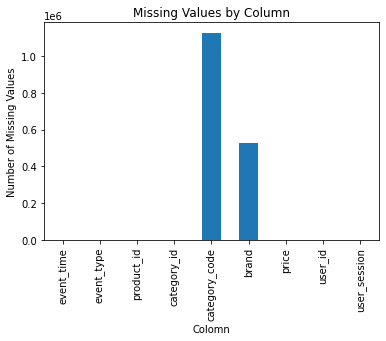

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('Colomn')
ax.set_ylabel('Number of Missing Values')
ax.set_title('Missing Values by Column')


df.isnull().sum().plot(kind='bar')

_Missing values are in columns category_code and brand._

_The most missing values are in the ‘category_code’ column, which is 1127141 missing values., followed by the 'brand' which is 524374 missing values. These NA value will not be deleted so as to accurately asses the price distribution._

## Handle Missing Data

### Category_Code

In [ ]:
# handle missing data - replace values with modus
df["category_code"].value_counts()

electronics.smartphone          1013848
electronics.clocks               132375
computers.notebook               102932
electronics.audio.headphone       96561
electronics.video.tv              79230
                                 ...   
apparel.skirt                       114
apparel.shoes.step_ins              104
apparel.shorts                       67
country_yard.furniture.bench         47
apparel.jacket                       35
Name: category_code, Length: 123, dtype: int64

In [ ]:
df["category_code"].fillna("electronics.smartphone", inplace=True)

### Brand

In [ ]:
# handle missing data - replace values with modus
df["brand"].value_counts()

samsung      442769
apple        379513
xiaomi       255442
huawei       105211
lucente       53702
              ...  
revuele           1
mustela           1
mhp               1
elleci            1
atkinsons         1
Name: brand, Length: 2494, dtype: int64

In [ ]:
df["brand"].fillna("samsung", inplace=True)

In [ ]:
# Check Missing Values by Column
# Check missing values in each feature
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

_There is no missing data in each column._

## Handle Datetime

In [ ]:
# transform datetime column
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
df['event_time']

0         2019-10-01 00:00:00+00:00
1         2019-10-01 00:00:00+00:00
2         2019-10-01 00:00:01+00:00
3         2019-10-01 00:00:01+00:00
4         2019-10-01 00:00:04+00:00
                     ...           
3592235   2019-10-04 01:57:00+00:00
3592236   2019-10-04 01:57:00+00:00
3592237   2019-10-04 01:57:00+00:00
3592238   2019-10-04 01:57:00+00:00
3592239   2019-10-04 01:57:00+00:00
Name: event_time, Length: 3592240, dtype: datetime64[ns, UTC]

## Handle Outlier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592240 entries, 0 to 3592239
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 246.7+ MB


In [ ]:
# assign variable for column in numeric type
numeric_column = ['product_id', 'category_id', 'price','user_id']

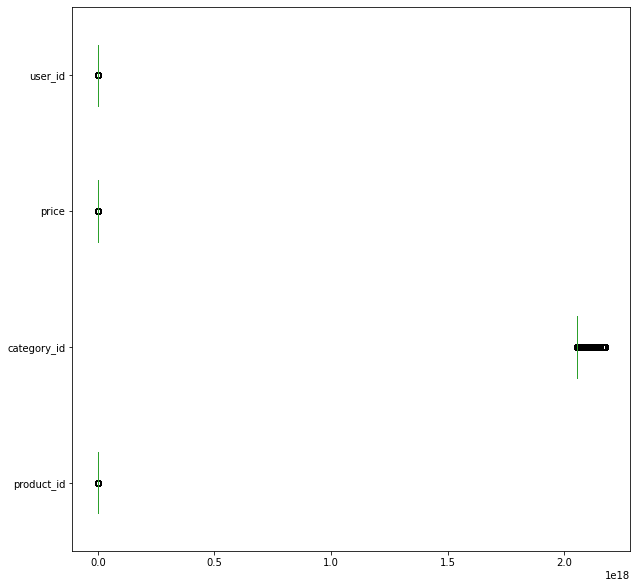

In [ ]:
# check outlier using boxplot - 1
df.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

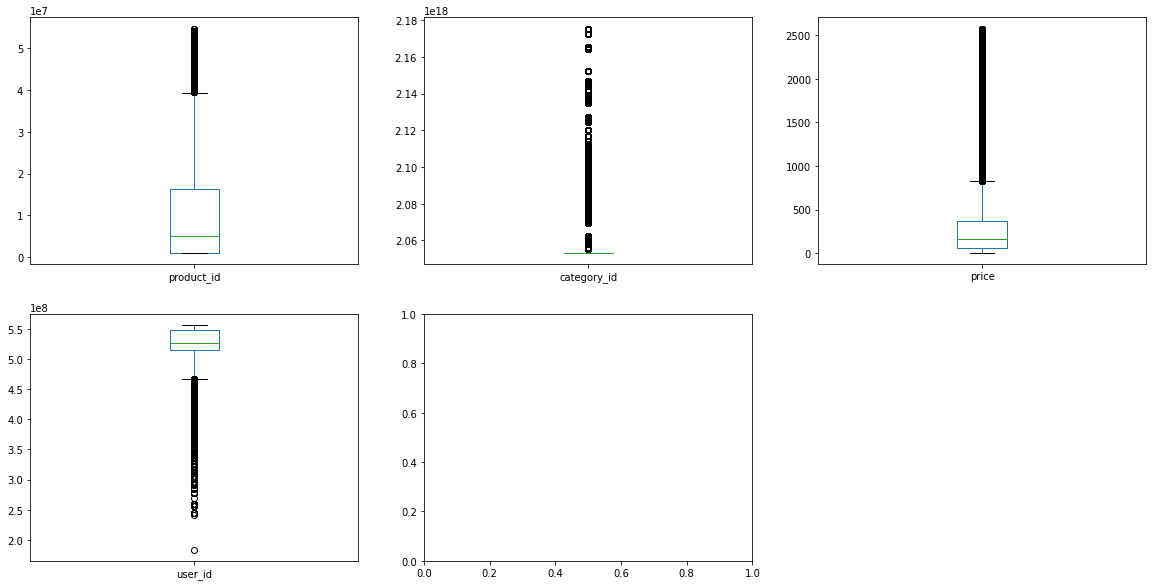

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

for i,el in enumerate(numeric_column):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)

fig.delaxes(axes[1][2])
plt.show()

In [ ]:
# get IQR for each numeric column
Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 product_id     1.005115e+06
category_id    2.053014e+18
price          6.435000e+01
user_id        5.156111e+08
Name: 0.25, dtype: float64

Q3:
 product_id     1.640002e+07
category_id    2.053014e+18
price          3.702000e+02
user_id        5.483663e+08
Name: 0.75, dtype: float64

IQR:
 product_id     1.539490e+07
category_id    7.239369e+09
price          3.058500e+02
user_id        3.275526e+07
dtype: float64

Min:
 product_id    -2.208724e+07
category_id    2.053014e+18
price         -3.944250e+02
user_id        4.664782e+08
dtype: float64

Max:
 product_id     3.949237e+07
category_id    2.053014e+18
price          8.289750e+02
user_id        5.974992e+08
dtype: float64


In [ ]:
# filter product_id
filter_product_min = df['product_id']<boxplot_min['product_id']
filter_product_max = df['product_id']>boxplot_max['product_id']

# filter category_id
filter_category_min = df['category_id']<boxplot_min['category_id']
filter_category_max = df['category_id']>boxplot_max['category_id']

# filter price
filter_price_min = df['price']<boxplot_min['price']
filter_price_max = df['price']>boxplot_max['price']

# filter user_id
filter_user_min = df['user_id']<boxplot_min['user_id']
filter_user_max = df['user_id']>boxplot_max['user_id']

df_non_outlier = df[~(
    filter_product_min|filter_product_max|filter_category_min|filter_category_max|filter_price_min|filter_price_max|filter_user_min|filter_user_max
    )]

In [ ]:
df_non_outlier.shape

(3050658, 9)

In [ ]:
df_non_outlier

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,samsung,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
6,2019-10-01 00:00:08+00:00,view,17300353,2053013553853497655,electronics.smartphone,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08+00:00,view,31500053,2053013558031024687,electronics.smartphone,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
...,...,...,...,...,...,...,...,...,...
3592235,2019-10-04 01:57:00+00:00,view,3601540,2053013563810775923,appliances.kitchen.washer,lg,591.75,515173815,a197b88e-0fd8-497f-a3b8-b883acb589ea
3592236,2019-10-04 01:57:00+00:00,purchase,26202383,2053013563693335403,electronics.smartphone,sokolov,13.64,556428395,7b5141ff-a3c3-4f91-89fc-5e5b4a66616b
3592237,2019-10-04 01:57:00+00:00,view,22700129,2053013556168753601,electronics.smartphone,stels,66.93,512856999,289240e2-c81d-491b-b14e-ce0a97cb17fc
3592238,2019-10-04 01:57:00+00:00,view,31501077,2053013558031024687,electronics.smartphone,samsung,172.44,555117883,e6d12b86-9e9a-431d-91e8-80c6150ad4a9


## Handle Non-metric Data

In [ ]:
# check unique values - Event_type
df['event_type'].value_counts()

view        3479950
purchase      58402
cart          53888
Name: event_type, dtype: int64

In [ ]:
# transform into numerical using pandas get dummies
event_transform_df = pd.get_dummies(df['event_type'])
event_transform_df

,cart,purchase,view
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
3592235,0,0,1
3592236,0,1,0
3592237,0,0,1
3592238,0,0,1


In [ ]:
# column_name_event = list(event_transform_df.columns)+'test'
column_name_event = list(event_transform_df.columns)
column_name_event = ['event_'+s for s in column_name_event]
event_transform_df.columns = column_name_event

In [ ]:
print(event_transform_df.columns)

Index(['event_cart', 'event_purchase', 'event_view'], dtype='object')


In [ ]:
# join the get_dummies result dataframe with the original dataframe
df_with_dummies = pd.concat([df,event_transform_df],axis=1)

In [ ]:
# check result get_dummies
df_with_dummies[['event_type']+column_name_event]

,event_type,event_cart,event_purchase,event_view
0,view,0,0,1
1,view,0,0,1
2,view,0,0,1
3,view,0,0,1
4,view,0,0,1
...,...,...,...,...
3592235,view,0,0,1
3592236,purchase,0,1,0
3592237,view,0,0,1
3592238,view,0,0,1


In [ ]:
# check combination
df_with_dummies[['event_type']+column_name_event].value_counts()

event_type  event_cart  event_purchase  event_view
view        0           0               1             3479950
purchase    0           1               0               58402
cart        1           0               0               53888
dtype: int64

# Exploring the Data

## The Behaviour of Visitors/Customers in October 2019

In [ ]:
df['event_type'].value_counts()

view        3479950
purchase      58402
cart          53888
Name: event_type, dtype: int64

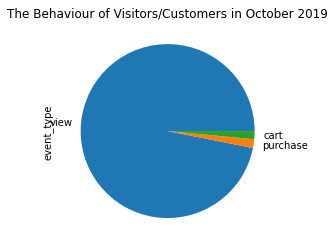

In [ ]:
# The behaviour of visitors in October 2019
df['event_type'].value_counts().plot(kind='pie')
plt.title('The Behaviour of Visitors/Customers in October 2019')
plt.show()

_In general, online shop visitors have a habit of viewing goods or add items to the cart but not yet certainly buy. Visitors/customers who buy goods at October 2019 totaled 58402 Visitors (1.63%)._

## Items are most viewed by Visitors/Customers

In [ ]:
# Items are most viewed by Visitors/Customers 
df[df["event_type"]=="view"]["category_code"].value_counts().head(10)

electronics.smartphone              2058075
electronics.clocks                   129600
computers.notebook                   101317
electronics.audio.headphone           90303
electronics.video.tv                  75979
appliances.kitchen.refrigerators      66076
appliances.environment.vacuum         61231
appliances.kitchen.washer             58959
apparel.shoes                         49439
auto.accessories.player               41544
Name: category_code, dtype: int64

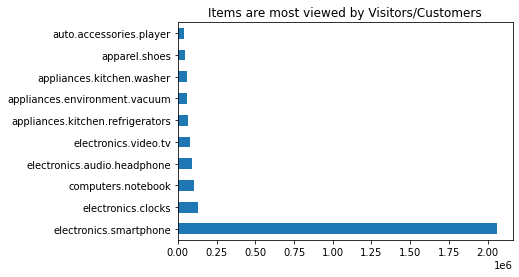

In [ ]:
# Items are most viewed by Visitors/Customers Distribution
df[df["event_type"]=="view"]["category_code"].value_counts().head(10).plot(kind='barh')
plt.title('Items are most viewed by Visitors/Customers')
plt.show()


_The items most visited/viewed by online shop visitors/customers in October 2019 are electronics.smartphones.Number of visited/viewed of items electronics.smartphones reached 2058075 units in October 2019._

_Many consumers buy electronic smartphones because smartphones are goods that are used all the time. Smartphones can be used for work, study and entertainment. Smartphones are also easy to carry everywhere because of the size that fits in the pocket. In addition, smartphone companies release new products almost every period so that many users want to buy smartphones. Seeing the very large smartphone consumer market, the e-commerce business team can conduct smartphone purchase promos at the beginning of every month and hold an installment system to increase smartphone sales._

## Brand of goods are purchased the most by Visitors/Customers

In [ ]:
df[df["event_type"]=="purchase"]["brand"].value_counts().head(10)

samsung     18409
apple       12209
xiaomi       4486
huawei       2094
lucente       953
oppo          730
lg            643
elenberg      535
sony          521
artel         504
Name: brand, dtype: int64

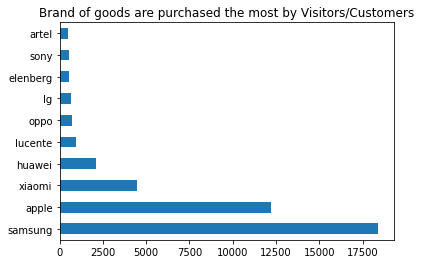

In [ ]:
# Brand of goods are purchased the most by Visitors/Customers Distribution
df[df["event_type"]=="purchase"]["brand"].value_counts().head(10).plot(kind='barh')
plt.title('Brand of goods are purchased the most by Visitors/Customers')
plt.show()

_Samsung has become the brand that is most in demand by customers in October 2019. Number of purchases of brand goods Samsung reached 18409 units in October 2019._

_Many consumers choose the brand Samsung because it already has a strong and positive image for the smartphone segment. Samsung also has a simple and trend-following model. In addition, Samsung is diligent in innovating and releasing the latest technology. Seeing Samsung's very large consumer market, the e-commerce business team can make bundling package promos to expand the market._

## Price of goods in the Online Store in October 2019

To analyse the price distribution fairly, the products with 0 (zero) price tag are removed from the dataset because they do not weigh the same consideration when being purchased.

In [ ]:
# describe price of goods in the Online Store in October 2019

df['price'][df["price"] != 0].describe()

count    3.586913e+06
mean     3.000685e+02
std      3.704095e+02
min      7.900000e-01
25%      6.487000e+01
50%      1.647100e+02
75%      3.704100e+02
max      2.574070e+03
Name: price, dtype: float64

_The highest item price in the Online Store in October 2019 was 2574.07_

_The lowest item price in the Online Store in October 2019 was 0.79_

_The average price of goods in online stores in October 2019 is 300.0685_

## The behavior of visitors at a specific time of the day

In [ ]:
df["event_time"].dt.day_name().value_counts()

Tuesday      1244245
Wednesday    1191328
Thursday     1127303
Friday         29364
Name: event_time, dtype: int64

In [ ]:
df["event_type"].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [ ]:
df_not_view = df[df["event_type"] != "view"]

In [ ]:
df_not_view

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
331,2019-10-01 00:05:14+00:00,cart,5100816,2053013553375346967,electronics.smartphone,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae
379,2019-10-01 00:06:02+00:00,purchase,5100816,2053013553375346967,electronics.smartphone,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07+00:00,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
...,...,...,...,...,...,...,...,...,...
3592206,2019-10-04 01:56:57+00:00,cart,1002547,2053013555631882655,electronics.smartphone,apple,461.50,543927146,cc3c2d72-8abe-4ae9-b8e4-cd51880ef0e5
3592217,2019-10-04 01:56:58+00:00,cart,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,540065528,03034dda-61b4-4059-b373-fd582f162328
3592219,2019-10-04 01:56:58+00:00,cart,1004834,2053013555631882655,electronics.smartphone,samsung,174.31,519539888,b917c1e9-a866-44fa-b19c-0bea1332dad5
3592226,2019-10-04 01:56:59+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,975.56,538769533,2bd3a6c3-2da7-4ad9-a5ee-a0085db4e487


In [ ]:
df_not_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112290 entries, 162 to 3592236
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     112290 non-null  datetime64[ns, UTC]
 1   event_type     112290 non-null  object             
 2   product_id     112290 non-null  int64              
 3   category_id    112290 non-null  int64              
 4   category_code  112290 non-null  object             
 5   brand          112290 non-null  object             
 6   price          112290 non-null  float64            
 7   user_id        112290 non-null  int64              
 8   user_session   112290 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
df_not_view["event_time"].dt.day_name().value_counts()

Thursday     38578
Wednesday    36737
Tuesday      35965
Friday        1010
Name: event_time, dtype: int64

In [ ]:
df_purchased = df[df["event_type"] == "purchase"]

In [ ]:
df_purchased

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02+00:00,purchase,5100816,2053013553375346967,electronics.smartphone,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07+00:00,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26+00:00,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
3591868,2019-10-04 01:56:11+00:00,purchase,26201120,2053013563693335403,electronics.smartphone,lucente,139.77,520374998,5e28f317-7f0d-48aa-b28b-a1daccc32112
3591973,2019-10-04 01:56:26+00:00,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,252.88,556425694,fc227a02-c553-43d0-badd-5a43efad4e0a
3592198,2019-10-04 01:56:55+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,975.56,532300356,2d5c6090-fdf6-495d-9360-ba4e40c717b7
3592226,2019-10-04 01:56:59+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,975.56,538769533,2bd3a6c3-2da7-4ad9-a5ee-a0085db4e487


In [ ]:
df_purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58402 entries, 162 to 3592236
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   event_time     58402 non-null  datetime64[ns, UTC]
 1   event_type     58402 non-null  object             
 2   product_id     58402 non-null  int64              
 3   category_id    58402 non-null  int64              
 4   category_code  58402 non-null  object             
 5   brand          58402 non-null  object             
 6   price          58402 non-null  float64            
 7   user_id        58402 non-null  int64              
 8   user_session   58402 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 4.5+ MB


In [ ]:
df_purchased["event_time"].dt.day_name().value_counts()

Wednesday    19469
Tuesday      19307
Thursday     19255
Friday         371
Name: event_time, dtype: int64

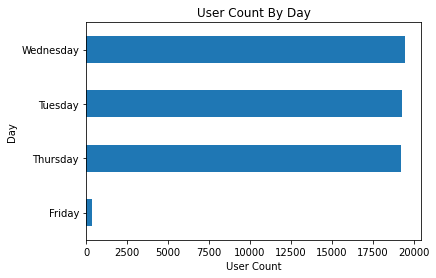

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Day')
ax.set_title('User Count By Day')


df_purchased["event_time"].dt.day_name().value_counts().sort_values().plot(kind='barh')

_Most consumers shop at e-commerce on Wednesday. Actually, consumers have seen the product since Tuesday. After Tuesday consumers are still considering whether to buy or not. Besides that consumers are still comparing one product to another. The final decision to buy is mostly made on Wednesday. The e-commerce business team can provide a campaign to convince customers. The campaign can be intensified on Wednesday._

## The best product to sell at a specific time of the day

### Category Code

In [ ]:
df_purchased[df_purchased["event_time"].dt.day_name()=="Wednesday"]["category_code"].value_counts().head(10)

electronics.smartphone               13333
electronics.audio.headphone            879
electronics.video.tv                   592
electronics.clocks                     533
computers.notebook                     422
appliances.kitchen.washer              348
appliances.environment.vacuum          302
appliances.kitchen.refrigerators       225
appliances.environment.air_heater      173
electronics.tablet                     124
Name: category_code, dtype: int64

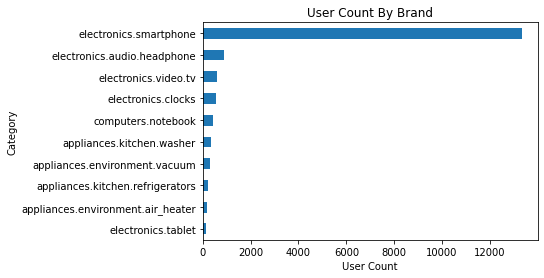

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Category')
ax.set_title('User Count By Brand')

df_purchased[df_purchased["event_time"].dt.day_name()=="Wednesday"]["category_code"].value_counts().head(10).sort_values().plot(kind='barh');

_electronics.smartphone has become the category_code that is most in demand at a specific time of the day by customers in October 2019. Number of purchases of category_code goods electronics.smartphone reached 13333 units in Wednesday._

### Brand

In [ ]:
df_purchased[df_purchased["event_time"].dt.day_name()=="Wednesday"]["brand"].value_counts().head(10)

samsung     6269
apple       4043
xiaomi      1497
huawei       692
lucente      319
oppo         241
lg           203
artel        186
elenberg     184
acer         172
Name: brand, dtype: int64

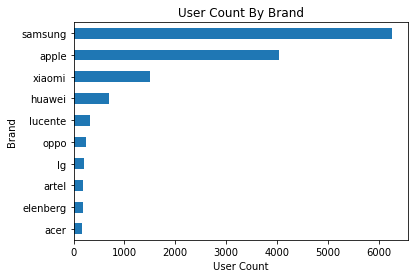

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Brand')
ax.set_title('User Count By Brand')

df_purchased[df_purchased["event_time"].dt.day_name()=="Wednesday"]["brand"].value_counts().head(10).sort_values().plot(kind='barh');

_Samsung has become the brand that is most in demand at a specific time of the day by customers in October 2019. Number of purchases of brand goods Samsung reached 6269 units in Wednesday._

## The behavior of our repeat user vs new user

_Disclaimer:_

I defined user that customer who purchase the product and cart the product (written as "not_view")

_New customer: not_view_count is just one_

_Repeat customer: not_view_count is more than one_

In [ ]:
df["user_id"].value_counts().values

array([926, 598, 572, ...,   1,   1,   1])

In [ ]:
!pip install pandasql
import pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=afe5213363bdb5023ed5dacba79036fffd618e38726b14064c6e3be1d7e8c601
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
user_count = pandasql.sqldf("""

select user_id, count(*) as counts
from df_not_view
group by 1 
order by 2 desc

""")

In [ ]:
user_count

,user_id,counts
0,514110288,117
1,548318522,80
2,546907969,70
3,513320236,67
4,525351013,67
...,...,...
48083,556558168,1
48084,556558182,1
48085,556558355,1
48086,556558499,1


In [ ]:
df_not_view_count = pd.merge(df_not_view, user_count, on ="user_id")

In [ ]:
repeat_user = df_not_view_count[df_not_view_count["counts"] >1]
new_user = df_not_view_count[df_not_view_count["counts"] == 1]

### New User

In [ ]:
new_user["event_type"].value_counts()

purchase    17656
cart         6989
Name: event_type, dtype: int64

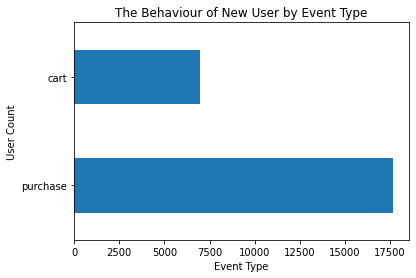

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('Event Type')
ax.set_ylabel('User Count')
ax.set_title('The Behaviour of New User by Event Type')


new_user["event_type"].value_counts().plot(kind='barh');

In [ ]:
new_user["category_code"].value_counts().head()

electronics.smartphone         15721
electronics.audio.headphone     1217
electronics.clocks               713
electronics.video.tv             668
computers.notebook               604
Name: category_code, dtype: int64

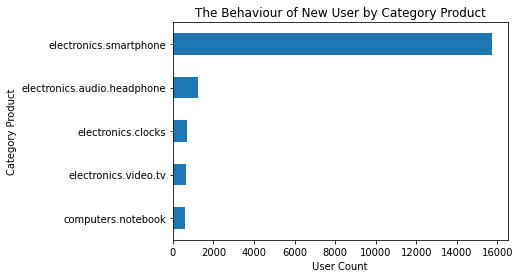

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Category Product')
ax.set_title('The Behaviour of New User by Category Product')

new_user["category_code"].value_counts().head().sort_values().plot(kind='barh');

_Most new users buy electronics smartphone products._

_The e-commerce business team can make promo of this product category to attract more new market users._

### Repeat User

In [ ]:
repeat_user["event_type"].value_counts()

cart        46899
purchase    40746
Name: event_type, dtype: int64

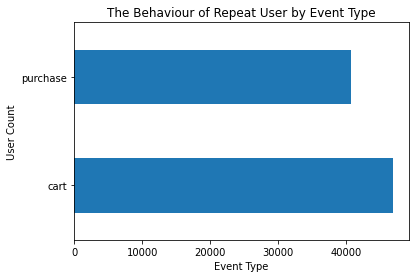

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('Event Type')
ax.set_ylabel('User Count')
ax.set_title('The Behaviour of Repeat User by Event Type')


repeat_user["event_type"].value_counts().plot(kind='barh');

In [ ]:
repeat_user["category_code"].value_counts().head()

electronics.smartphone         67193
electronics.audio.headphone     5041
electronics.video.tv            2583
electronics.clocks              2062
computers.notebook              1011
Name: category_code, dtype: int64

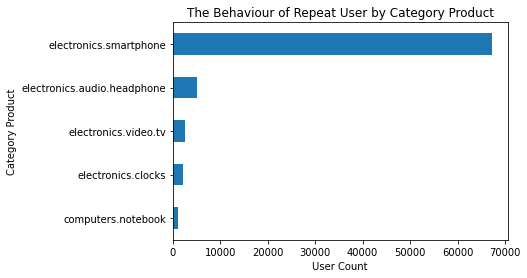

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Category Product')
ax.set_title('The Behaviour of Repeat User by Category Product')

repeat_user["category_code"].value_counts().head().sort_values().plot(kind='barh');

_Most repeat users buy smartphone electronics products._

_Meanwhile product electronics audio headphones have a very large gap._ 

_The e-commerce business team can make product bundling between electronics smartphone products and electronics audio headphones to increase profits from product categories that are still low in orders._

The difference between the behavior of new users and repeat users is that new users tend to purchase the product right away rather than adding the product to their cart. This is because new users when opening e-commerce only focuses on purchasing products. Whereas repeat users when opening e-commerce only to see the latest products, if like the products, repeat users tend to add products to the cart first, then repeat users are still considering buying or not and comparing one product with other products. If the product is as expected, repeat users will buy the product.